[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DoranLyong/Image-Processing-from-Scratch/blob/main/05_Histogram_processing/01_Image_Histogram.ipynb)

In [78]:
import os 
import os.path as osp 
import sys 
sys.path.insert(0, '..')


from glob import glob 
from PIL import Image 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd 

In [ ]:
from google.colab import files 
uploaded = files.upload()

In [41]:
imgPath = glob(osp.join("..", "data",  'washed_out_pollen.tif'))
print(imgPath)

['..\\data\\washed_out_pollen.tif']


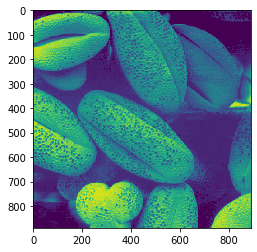

In [63]:
tiff_img = Image.open(imgPath[0])

# Map PIL mode to numpy dtype (note this may need to be extended)
dtype = {'F': np.float32, 'L': np.uint8}[tiff_img.mode]


# Load the data into a flat numpy array and reshape
np_img = np.array(tiff_img, dtype=dtype)

plt.imshow(np_img)
plt.show()

In [75]:
dimY, dimX = np_img.shape
bins = 256; # uint8 image range := [0, 255] 
bin_bar = np.array(range(bins))

#### PDF

In [80]:
frequency = np.zeros([bins], dtype=np.float32)  # bins := [0,255]

for i in range(dimY):
    for j in range(dimX): 
        intensity = np_img[i, j]
        frequency[intensity] = frequency[intensity] + 1
        
pdf = frequency/(dimY*dimX);

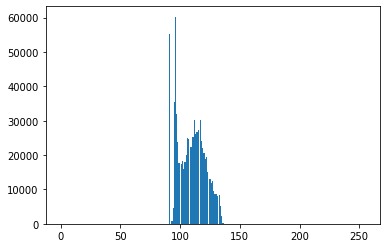

In [86]:
hist = plt.hist(bin_bar, bins=bins, weights=frequency)

#### CDF 

In [67]:
cdf = np.zeros([bins,1], dtype=np.float32) 
probc = np.zeros([bins,1])
cum = np.zeros([bins,1])
sum = 0 
numofpixels = dimX * dimY

In [72]:
for i in range(bins): 
    sum = sum + frequency[i]
    cum[i] = sum
    probc[i]=cum[i]/numofpixels
    cdf[i]=np.around(probc[i]*255)

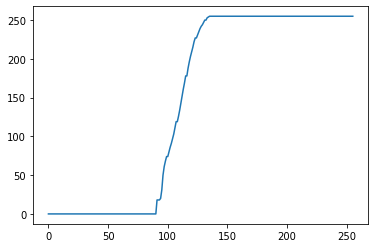

In [90]:
hist = plt.plot(bin_bar, cdf)